In [2]:
library(readr)
library(dplyr)
library(mltools)
library(Metrics)
library(forecast)

In [3]:
regressionMetrics <- function(y,yhat) {
    res = cbind('MSE'= Metrics::mse(y,yhat),
           'RMSE'= Metrics::rmse(y,yhat),
           'MAE'= Metrics::mae(y,yhat),
           'MSLE'= Metrics::msle(y, yhat),
           'RMSLE'= Metrics::rmsle(y,yhat)     
          )
    return(res)
}

### Train data

In [6]:
train <- read_csv('C:/Users/galie/DataScience/project/train19.csv')  %>% as.data.frame
head(train)


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  .default = col_double()
)
i Use `spec()` for the full column specifications.




,wk_atm_p,wk_dew_p,wk_avg_max_tmp,wk_avg_tm,wk_min_tm,wk_avg_min_tmp,wk_avg_hum,wk_min_hum,wk_avg_precipitation,num_patients,...,monthly_precipitation,q_precipitation,min_y_q_precipitation,q_temp,mean_t_d,percipitation,min_y_q_temp,max_y_precipitation,seasonality,per_seasonality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,946.2505,17.74683,30.04929,23.15242,14.4,18.00643,74.23175,34,0.04571429,614,...,7.250667,39.481619,8.331429,22.64288,17.92730,33.67429,17.92730,48.12000,0.02187120,0.2064082
2,946.4756,14.66143,25.89429,19.09976,8.2,14.13429,77.62262,21,0.06285714,1,...,5.534762,9.069048,9.069048,18.17738,18.17738,36.27619,18.17738,41.66286,0.05185037,0.3750689
3,943.2068,19.78702,26.15143,21.84917,16.3,19.73714,88.72024,49,12.98285714,375,...,35.451429,84.497143,17.985524,22.56830,17.93779,84.11238,17.93779,42.20571,-0.11685832,2.4634417
4,942.4174,19.73619,31.56286,24.22643,17.8,19.97429,78.17024,30,5.77142857,3342,...,22.128571,39.481619,8.331429,22.64288,17.92730,33.67429,17.92730,48.12000,-0.01727395,2.4782576
5,943.4837,15.28879,22.43714,18.71194,9.4,15.74286,82.14782,30,3.87904762,2,...,5.534762,9.069048,9.069048,18.17738,18.17738,36.27619,18.17738,41.66286,0.05185037,0.3750689
6,944.0730,18.96966,29.72571,23.27425,16.0,18.94286,78.72044,37,5.22380952,2757,...,10.102381,39.481619,8.331429,22.64288,17.92730,33.67429,17.92730,48.12000,-0.60667298,2.1660677


### Dev data

In [75]:
dev <- read_csv('C:/Users/galie/DataScience/project/dev19.csv')  %>% as.data.frame
head(dev)


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  .default = col_double()
)
i Use `spec()` for the full column specifications.




,wk_atm_p,wk_dew_p,wk_avg_max_tmp,wk_avg_tm,wk_min_tm,wk_avg_min_tmp,wk_avg_hum,wk_min_hum,wk_avg_precipitation,num_patients,...,monthly_precipitation,q_precipitation,min_y_q_precipitation,q_temp,mean_t_d,percipitation,min_y_q_temp,max_y_precipitation,seasonality,per_seasonality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,942.7839,18.84619,31.06000,24.32833,16.8,19.75429,74.00119,25,5.24285714,89,...,19.1085714,36.81143,24.634286,22.04498,18.53152,117.98857,18.53152,36.15714,-0.08966064,-0.9112564
2,952.3449,12.02574,25.75000,18.04568,8.0,12.65714,71.27232,22,0.01428571,4,...,0.8785714,15.32857,9.069048,20.98666,18.17738,36.27619,18.17738,41.66286,0.38628365,-1.1052278
3,945.3398,19.49063,30.33357,23.73659,15.4,19.50667,78.89524,39,2.17714286,2301,...,10.1023810,39.48162,8.331429,22.64288,17.92730,33.67429,17.92730,48.12000,-0.60667298,2.1660677
4,947.2357,13.51964,25.49143,18.86726,9.8,13.96000,73.38690,30,0.18285714,15,...,12.9542857,36.81143,24.634286,22.04498,18.53152,117.98857,18.53152,36.15714,0.38628365,-1.1052278
5,943.3421,19.02060,27.78857,22.30197,15.2,19.05143,82.96372,43,4.76000000,526,...,12.4971429,50.40619,24.634286,21.70013,18.53152,117.98857,18.53152,36.15714,0.02187120,0.2064082
6,946.9232,13.11190,24.02000,17.45310,5.5,13.13429,78.20714,16,0.96000000,5,...,2.8228571,15.06857,15.068571,18.63865,18.63865,62.59429,18.63865,35.22952,0.05185037,0.3750689


### Supervised models

In [9]:
library(tree)
library(ranger)
library(xgboost)
#library(class)
library(e1071)
#library(FNN)

In [10]:
models_list <- NULL

### Linear model

In [18]:
mod1 <- lm(log_num_patients ~., data=train)
pred1 <- predict(mod1, newdata=train)

Warning message in predict.lm(mod1, newdata = train):
"prediction from a rank-deficient fit may be misleading"


In [14]:
summary(pred1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.406   3.595   4.097   5.736   9.509 

In [16]:
outcome <- train$log_num_patients

In [20]:
prediction <- predict(mod1, dev)
model_output <- cbind(dev, prediction)

Warning message in predict.lm(mod1, dev):
"prediction from a rank-deficient fit may be misleading"


In [21]:
regressionMetrics(train$log_num_patients, pred1)

MSE,RMSE,MAE,MSLE,RMSLE
0.2568746,0.506828,0.4062308,0.01775691,0.133255


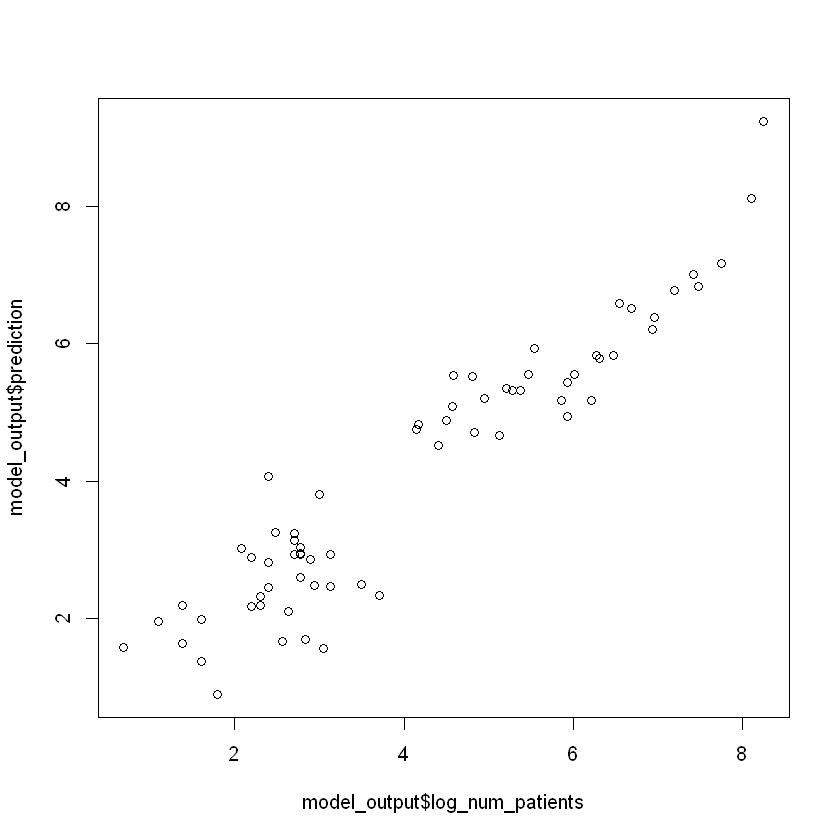

In [22]:
plot(model_output$log_num_patients,model_output$prediction)

In [24]:
models_list = rbind(data.frame(model= "Linear Regression", regressionMetrics(train$log_num_patients, pred1)))
models_list

model,MSE,RMSE,MAE,MSLE,RMSLE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Linear Regression,0.2568746,0.506828,0.4062308,0.01775691,0.133255


### Decision Tree

In [25]:
mod2 <- tree(log_num_patients ~., data=train)
pred2 <- predict(mod2, newdata = train)

In [27]:
models_list = rbind(models_list,data.frame(model= "Decision Tree", regressionMetrics(train$log_num_patients, pred2)))
models_list

model,MSE,RMSE,MAE,MSLE,RMSLE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Linear Regression,0.2568746,0.5068280,0.4062308,0.017756907,0.13325504
Decision Tree,0.0752965,0.2744021,0.2249258,0.007406801,0.08606277


In [29]:
library(partykit)
mod2a <- ctree(log_num_patients ~., data=train)
pred2a <- predict(mod2a, newdata = train)

Warning message:
"package 'partykit' was built under R version 4.0.5"
Loading required package: grid

Loading required package: libcoin

Warning message:
"package 'libcoin' was built under R version 4.0.5"
Loading required package: mvtnorm



In [32]:
models_list = rbind(models_list,data.frame(model= "Conditional Decision Tree", regressionMetrics(train$log_num_patients, pred2a)))
models_list 

model,MSE,RMSE,MAE,MSLE,RMSLE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Linear Regression,0.256874639,0.50682802,0.40623082,0.0177569067,0.13325504
Decision Tree,0.075296499,0.27440208,0.22492576,0.0074068005,0.08606277
Conditional Decision Tree,0.006439474,0.08024633,0.05719345,0.0007057612,0.02656617


### Random Forest

model,MSE,RMSE,MAE,MSLE,RMSLE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Linear Regression,0.256874639,0.50682802,0.40623082,0.0177569067,0.13325504
Decision Tree,0.075296499,0.27440208,0.22492576,0.0074068005,0.08606277
Conditional Decision Tree,0.006439474,0.08024633,0.05719345,0.0007057612,0.02656617
Random Forest,0.016131487,0.12700979,0.08523833,0.0017205434,0.04147943


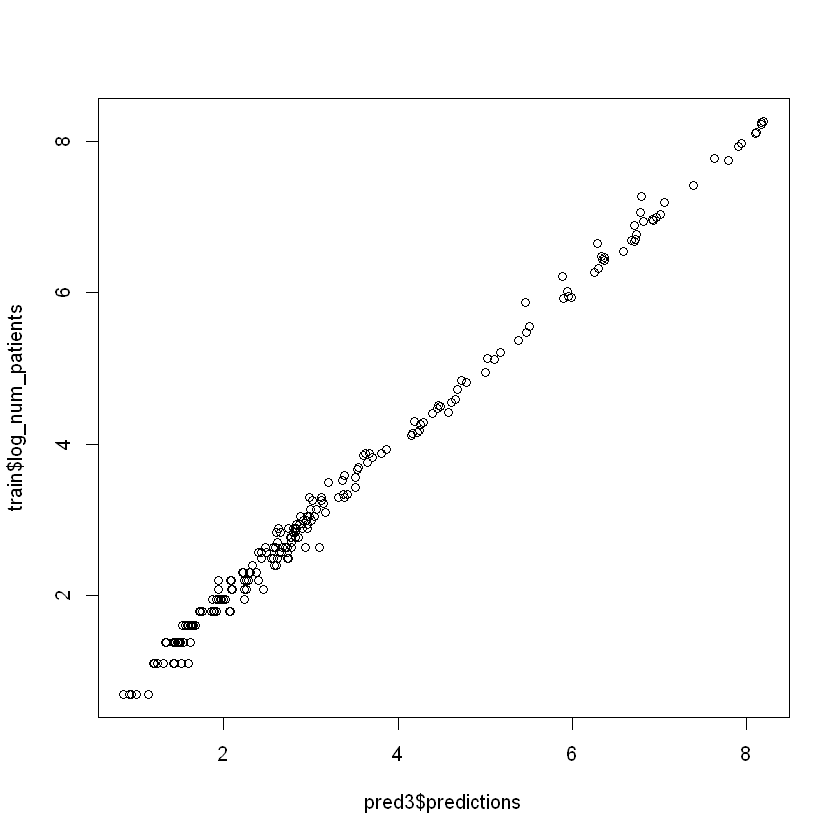

In [35]:
mod3 <- ranger(log_num_patients ~., data=train)
pred3 <- predict(mod3, data=train)

models_list = rbind(models_list, data.frame(model= "Random Forest", regressionMetrics(train$log_num_patients, pred3$predictions)))
models_list

plot(train$log_num_patients ~ pred3$predictions)

### Gradient Boosting Machine (GBM)

In [ ]:
# This requires the transformation of the data into a matrix

In [37]:
nm <- names(train)
nn <- setdiff(nm,'log_num_patients')
X <- as.matrix(train[,nn])
y <- as.numeric(train$log_num_patients)

In [38]:
data <- xgb.DMatrix(X, label = y)

In [39]:
set.seed(1)
mod4 = xgboost(data,nrounds = 100,print_every_n = 10)

[1]	train-rmse:2.946448 
[11]	train-rmse:0.105897 
[21]	train-rmse:0.008946 
[31]	train-rmse:0.003093 
[41]	train-rmse:0.001234 
[51]	train-rmse:0.000691 
[61]	train-rmse:0.000691 
[71]	train-rmse:0.000691 
[81]	train-rmse:0.000691 
[91]	train-rmse:0.000691 
[100]	train-rmse:0.000691 


In [42]:
nm1 <- names(dev)
nn1 <- setdiff(nm,'log_num_patients')
X1 <- as.matrix(dev[,nn])
y1<- as.numeric(dev$log_num_patients)

In [52]:
data1 <- xgb.DMatrix(X1, label = y1)

In [59]:
pred4 = predict(mod4, newdata = data1)

In [71]:

models_list = rbind(models_list, data.frame(model= "XGBoost", regressionMetrics(train$log_num_patients, pred4)))
models_list

#plot(train$log_num_patients ~ pred4)


Warning message in actual - predicted:
"longer object length is not a multiple of shorter object length"
Warning message in actual - predicted:
"longer object length is not a multiple of shorter object length"
Warning message in actual - predicted:
"longer object length is not a multiple of shorter object length"
Warning message in log(1 + actual) - log(1 + predicted):
"longer object length is not a multiple of shorter object length"
Warning message in log(1 + actual) - log(1 + predicted):
"longer object length is not a multiple of shorter object length"


model,MSE,RMSE,MAE,MSLE,RMSLE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Linear Regression,0.256874639,0.50682802,0.40623082,0.0177569067,0.13325504
Decision Tree,0.075296499,0.27440208,0.22492576,0.0074068005,0.08606277
Conditional Decision Tree,0.006439474,0.08024633,0.05719345,0.0007057612,0.02656617
Random Forest,0.016131487,0.12700979,0.08523833,0.0017205434,0.04147943
XGBoost,8.884993100,2.98077055,2.46881759,0.3692565148,0.60766480


In [67]:
# models_list <- models_list[-c(6,7,8,9),]

### Support Vector Machine (SVM)

model,MSE,RMSE,MAE,MSLE,RMSLE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Linear Regression,0.256874639,0.50682802,0.40623082,0.0177569067,0.13325504
Decision Tree,0.075296499,0.27440208,0.22492576,0.0074068005,0.08606277
Conditional Decision Tree,0.006439474,0.08024633,0.05719345,0.0007057612,0.02656617
Random Forest,0.016131487,0.12700979,0.08523833,0.0017205434,0.04147943
XGBoost,8.884993100,2.98077055,2.46881759,0.3692565148,0.60766480
SVM,0.071849206,0.26804702,0.20992053,0.0064403584,0.08025184


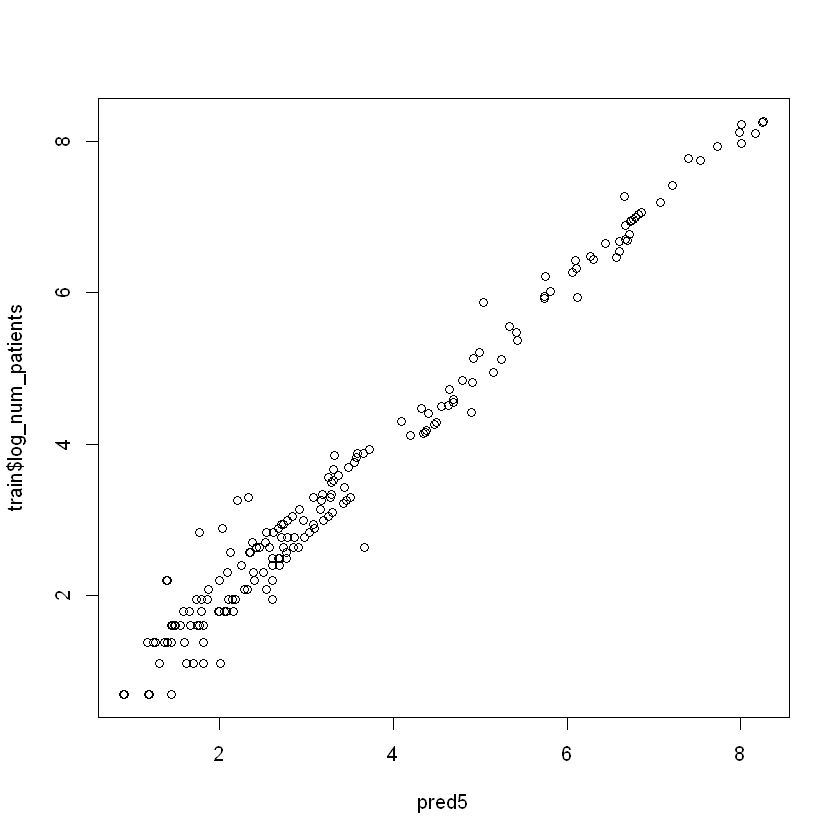

In [72]:
mod5 <- svm(log_num_patients ~., data=train)
pred5 <- predict(mod5, data=train)

models_list = rbind(models_list, data.frame(model= "SVM", regressionMetrics(train$log_num_patients, pred5)))
models_list

plot(train$log_num_patients ~ pred5)

## Model Selection

In [73]:
models_list %>% arrange(MAE)

model,MSE,RMSE,MAE,MSLE,RMSLE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Conditional Decision Tree,0.006439474,0.08024633,0.05719345,0.0007057612,0.02656617
Random Forest,0.016131487,0.12700979,0.08523833,0.0017205434,0.04147943
SVM,0.071849206,0.26804702,0.20992053,0.0064403584,0.08025184
Decision Tree,0.075296499,0.27440208,0.22492576,0.0074068005,0.08606277
Linear Regression,0.256874639,0.50682802,0.40623082,0.0177569067,0.13325504
XGBoost,8.884993100,2.98077055,2.46881759,0.3692565148,0.60766480


In [74]:
models_list %>% arrange(RMSE)

model,MSE,RMSE,MAE,MSLE,RMSLE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Conditional Decision Tree,0.006439474,0.08024633,0.05719345,0.0007057612,0.02656617
Random Forest,0.016131487,0.12700979,0.08523833,0.0017205434,0.04147943
SVM,0.071849206,0.26804702,0.20992053,0.0064403584,0.08025184
Decision Tree,0.075296499,0.27440208,0.22492576,0.0074068005,0.08606277
Linear Regression,0.256874639,0.50682802,0.40623082,0.0177569067,0.13325504
XGBoost,8.884993100,2.98077055,2.46881759,0.3692565148,0.60766480


### Conclusions

all models are not great. it looks like the XGBoost is the best, yet there might be some overfitting involved. 
Since I don't have outliers, I can rely on the RMSE. Linear regression is also a good option. 

### The test data

In [76]:
test <- read_csv('C:/Users/galie/DataScience/project/test19.csv')  %>% as.data.frame
head(test)


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  .default = col_double()
)
i Use `spec()` for the full column specifications.




,wk_atm_p,wk_dew_p,wk_avg_max_tmp,wk_avg_tm,wk_min_tm,wk_avg_min_tmp,wk_avg_hum,wk_min_hum,wk_avg_precipitation,num_patients,...,monthly_precipitation,q_precipitation,min_y_q_precipitation,q_temp,mean_t_d,percipitation,min_y_q_temp,max_y_precipitation,seasonality,per_seasonality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,948.7310,13.33714,24.80286,18.25333,9.2,13.66571,75.72381,23,0.62285714,3,...,5.681905,29.659048,17.985524,19.37982,17.93779,84.11238,17.93779,42.20571,0.38628365,-1.1052278
2,941.2775,18.56536,24.88571,20.88679,16.0,18.63143,87.45357,11,14.38285714,12,...,36.222857,84.497143,17.985524,22.56830,17.93779,84.11238,17.93779,42.20571,0.13521934,-1.0591955
3,946.1263,13.15131,24.50000,17.88595,9.1,13.42857,76.16786,28,0.52571429,2,...,5.681905,29.659048,17.985524,19.37982,17.93779,84.11238,17.93779,42.20571,0.38628365,-1.1052278
4,943.6505,13.64893,28.63143,21.09833,10.9,14.80286,65.54881,25,0.15000000,8,...,39.540238,82.824524,9.015714,22.95152,17.97791,38.99429,17.97791,39.54024,0.13521934,-1.0591955
5,946.4507,14.42524,28.68286,21.78274,9.1,16.95429,65.62500,28,1.77714286,6,...,1.882857,14.735714,9.015714,20.38999,17.97791,38.99429,17.97791,39.54024,-0.07314289,-2.1214202
6,946.1485,12.86833,25.26571,17.81738,6.6,12.12000,75.37500,35,0.08571429,39,...,1.752857,9.015714,9.015714,17.97791,17.97791,38.99429,17.97791,39.54024,0.05185037,0.3750689


### Testing the linear model on the data

In [77]:
prediction <- predict(mod1, test)
model_output <- cbind(test, prediction)

Warning message in predict.lm(mod1, test):
"prediction from a rank-deficient fit may be misleading"


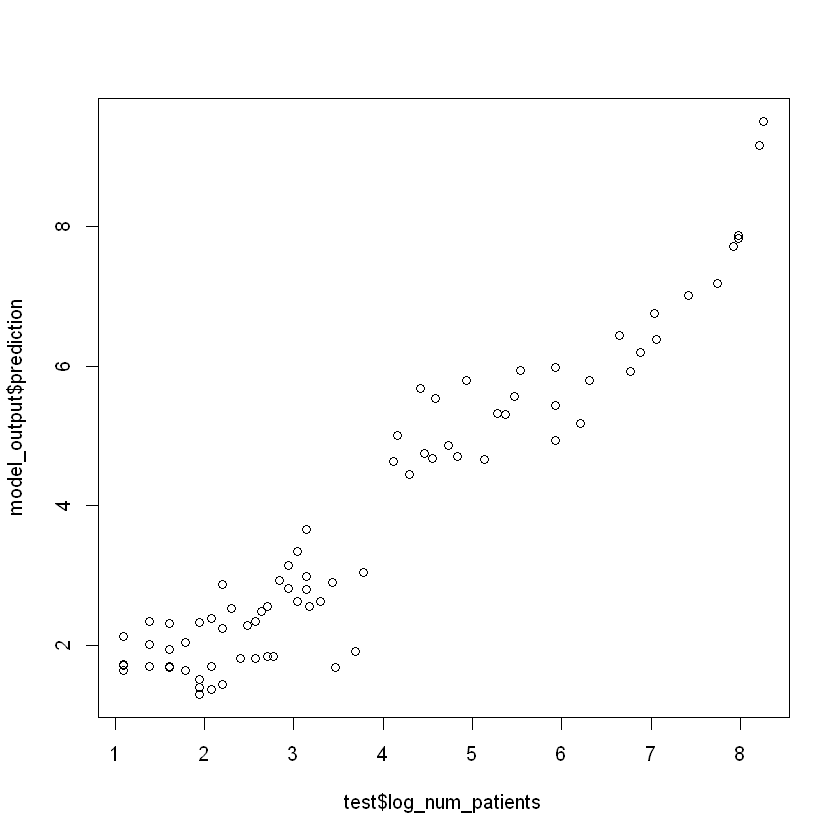

In [79]:
plot(test$log_num_patients,model_output$prediction)

### The End.

In [ ]:
# see conclusions and discussion in the main document.